# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [107]:
def F(n):
    for i in range(n):
        for j in range(n-i-1):
            print("-", end="")
        for k in range(i+1):
            print(chr(ord('A') + i-k), end="")
        for p in range(i):
            print(chr(ord('A') + p+1), end="")
        for q in range(n-i-1):
            print("-", end="")
        print()
    print("---------------------------------------------------------------------")
            

# Tests
F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
---------------------------------------------------------------------
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF
---------------------------------------------------------------------


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [108]:
def F(d : dict):
    for key in sorted(d.keys()):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    print("---------------------------------------------------------------")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][0], reverse=True):
        print(f"-{key}-, -{x}-, -{y}-")
    print("---------------------------------------------------------------")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][1]):
        print(f"-{key}-, -{x}-, -{y}-")
    print("***************************************************************")
    print("***************************************************************")

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-
---------------------------------------------------------------
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-
---------------------------------------------------------------
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
***************************************************************
***************************************************************
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-
---------------------------------------------------------------
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-
---------------------------------------------------------------
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-
***************************************************************
***************************************************************


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [109]:
#TODO
data = {}
row = 0
ALL_GRADES = list()
ALL_ROLL_NUM = list()

with open(r"student_records.csv", "r") as file:
    header = file.readline().strip().split(',')
    
    for line in file:
        list_of_items = line.split(",")
        
        roll_num = int(list_of_items[0])
        department = list_of_items[1]
        credit = int(list_of_items[2])
        course_name = list_of_items[3]
        course_type = list_of_items[4]
        grade = list_of_items[5].strip("\n")
        
        ALL_GRADES.append(grade)
        ALL_ROLL_NUM.append(roll_num)
        
        data[row] = {"roll" : roll_num,
                        "department":department,
                          "credit":credit,
                         "course_name":course_name,
                         "course_type":course_type,
                         "grade":grade}
        row += 1
for row in range(10):
    print(data[row])

{'roll': 588946, 'department': 'MA', 'credit': 3, 'course_name': 'EC250', 'course_type': 'hasmed_elective', 'grade': 'AB'}
{'roll': 145372, 'department': 'EP', 'credit': 4, 'course_name': 'EP407', 'course_type': 'hasmed_elective', 'grade': 'CC'}
{'roll': 834515, 'department': 'MA', 'credit': 8, 'course_name': 'EP885', 'course_type': 'hasmed_elective', 'grade': 'BB'}
{'roll': 344265, 'department': 'CSE', 'credit': 6, 'course_name': 'CSE699', 'course_type': 'honours', 'grade': 'AB'}
{'roll': 358405, 'department': 'MA', 'credit': 3, 'course_name': 'EE460', 'course_type': 'minor', 'grade': 'AP'}
{'roll': 781075, 'department': 'CE', 'credit': 8, 'course_name': 'CE540', 'course_type': 'honours', 'grade': 'CC'}
{'roll': 180828, 'department': 'CSE', 'credit': 6, 'course_name': 'CE880', 'course_type': 'minor', 'grade': 'AB'}
{'roll': 981238, 'department': 'MM', 'credit': 4, 'course_name': 'CSE226', 'course_type': 'minor', 'grade': 'AB'}
{'roll': 836881, 'department': 'MM', 'credit': 8, 'course_

In [110]:
print(len(data))
print(len(ALL_ROLL_NUM))
print(len(list(set(ALL_ROLL_NUM))))

3913
3913
100


In [111]:
print(list(set(ALL_GRADES)))

['CC', 'AP', 'AA', 'BB', 'AB', 'BC']


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [112]:
grade2num = {"AP" : 10,
            "AA" : 10,
            "AB" : 9,
            "BB" : 8,
            "BC" : 7,
            "CC" : 6,
            "CD" : 5,
            "DD" : 4,
            "FR" : 0}

In [117]:
#TODO
TOTAL_CREDITS = list()
CPI = list()
roll_num_temp = ALL_ROLL_NUM

for roll in roll_num_temp:
    indices = [i for i,x in enumerate(roll_num_temp) if x==roll]
    credit_sum = 0.0
    cpi_numerator = 0.0
    cpi = 0.0
    
    for index in indices: 
        credit_sum += data[index]['credit']
        cpi_numerator += grade2num[data[index]['grade']]*data[index]['credit']
    
    if credit_sum > 0:
        cpi = cpi_numerator/credit_sum
        print(f"Total credits = {credit_sum}, CPI = {cpi : .2f}")
    
        TOTAL_CREDITS.append(credit_sum)
        CPI.append(cpi)
    else:
        cpi = 0.0
    
    roll_num_temp = [x for x in roll_num_temp if x!=roll]
    # my kernel was running too slow so I was testing for only one student
    #break
    

Total credits = 199.0, CPI =  8.69
Total credits = 172.0, CPI =  8.02
Total credits = 189.0, CPI =  8.31
Total credits = 156.0, CPI =  9.10
Total credits = 211.0, CPI =  8.34
Total credits = 256.0, CPI =  8.26
Total credits = 185.0, CPI =  8.68
Total credits = 173.0, CPI =  8.51
Total credits = 220.0, CPI =  8.30
Total credits = 157.0, CPI =  8.57
Total credits = 256.0, CPI =  8.43
Total credits = 228.0, CPI =  8.37
Total credits = 206.0, CPI =  8.01
Total credits = 188.0, CPI =  8.40
Total credits = 248.0, CPI =  8.30
Total credits = 239.0, CPI =  8.47
Total credits = 235.0, CPI =  8.15
Total credits = 241.0, CPI =  8.17
Total credits = 195.0, CPI =  8.18
Total credits = 200.0, CPI =  8.69
Total credits = 164.0, CPI =  8.61
Total credits = 155.0, CPI =  8.22
Total credits = 216.0, CPI =  8.23
Total credits = 223.0, CPI =  8.64
Total credits = 185.0, CPI =  7.73
Total credits = 222.0, CPI =  8.43
Total credits = 225.0, CPI =  8.39
Total credits = 210.0, CPI =  8.64
Total credits = 160.

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [138]:
#TODO
roll_num_temp = ALL_ROLL_NUM
for roll in roll_num_temp:
    indices = [i for i,x in enumerate(roll_num_temp) if x==roll]
    core_credits = 0
    de_credits = 0
    fe_credits = 0
    hs_credits = 0
    
    for index in indices: 
        if(data[index]['course_type'] == "core"):
            core_credits += data[index]['credit']
        elif (data[index]['course_type'] == "department_elective"):
            de_credits += data[index]['credit']
        elif (data[index]['course_type'] == "flexible_elective"):
            fe_credits += data[index]['credit']
        elif (data[index]['course_type'] == "hasmed_elective"):
            hs_credits += data[index]['credit']
    
    if(core_credits >= 20 and de_credits >= 15 and fe_credits >= 10 and hs_credits >= 5):
        print(roll)
    
    roll_num_temp = [x for x in roll_num_temp if x!=roll]
    # my kernel was running too slow so I was testing for only one student
    #break

588946
145372
358405
781075
180828
981238
836881
847809
773982
500658
364146
871746
270007
597353
986057
379479
582912
613401
144528
485484
199713
214270
517837
482623
955757
143856
521087
265922
283796
534763
391848
971123
207443
488661
782129
928288
581858
733782
282482
572815
608952
628849
630568
388969
159438
841365
870642
970791
143142
998293
907454
608522
362471
465496
138296
461584
787967
750259


#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [139]:
#TODO
roll_num_temp = ALL_ROLL_NUM
for roll in roll_num_temp:
    indices = [i for i,x in enumerate(roll_num_temp) if x==roll]
    minor_credits = 0
    
    for index in indices: 
        if(data[index]['course_type'] == "minor"):
            minor_credits += data[index]['credit']
            
    if(minor_credits >= 10):
        print(roll)
    
    roll_num_temp = [x for x in roll_num_temp if x!=roll]
    
    # my kernel was running too slow so I was testing for only one student
    #break

588946
145372
834515
344265
358405
781075
180828
981238
836881
310604
847809
773982
500658
810863
124663
364146
871746
270007
597353
986057
718510
836431
379479
582912
788020
613401
144528
485484
199713
851029
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
194063
265922
283796
203200
301135
327122
381526
534763
391848
207443
488661
928288
581858
733782
282482
572815
608952
628849
630568
388969
478606
995208
841365
970791
143142
998293
907454
681499
888886
608522
465496
208100
138296
775967
692318
461584
626000
458200
581065
787967
381227
750259
881983
294697
816041
993835


#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [140]:
#TODO
roll_num_temp = ALL_ROLL_NUM
for roll in roll_num_temp:
    indices = [i for i,x in enumerate(roll_num_temp) if x==roll]
    honor_credits = 0
    
    for index in indices: 
        if(data[index]['course_type'] == "honours"):
            honor_credits += data[index]['credit']
            
    if(honor_credits >= 10):
        print(roll)
    
    roll_num_temp = [x for x in roll_num_temp if x!=roll]
    
    # my kernel was running too slow so I was testing for only one student
    #break

588946
145372
834515
344265
358405
781075
180828
981238
836881
310604
847809
773982
500658
810863
124663
364146
871746
270007
986057
718510
836431
379479
582912
788020
613401
144528
485484
680096
199713
851029
845623
150503
214270
517837
482623
721490
955757
589528
143856
571782
973158
703403
960395
521087
461971
879634
716985
265922
283796
203200
301135
327122
381526
534763
391848
329535
971123
207443
488661
782129
928288
581858
733782
282482
572815
608952
628849
630568
388969
159438
478606
995208
841365
870642
970791
143142
998293
907454
681499
888886
608522
362471
465496
138296
775967
692318
461584
626000
458200
581065
787967
381227
750259
881983
294697
816041
993835


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [121]:
#TODO
from scipy.optimize import minimize

func = lambda x: 2*(x[0] - x[1] - 3)**2 + 4*(x[0] + 2*x[1] + 1)**4
result = minimize(func, (1,0), constraints = (
                                            {
                                                "type" : "ineq", "fun" : lambda x: x[0] - x[1] + 3,
                                                "type" : "ineq", "fun" : lambda x:5 - (x[0]+1)**2 - (x[1]+1)**2
                                            }))
result.x

array([ 1.216848  , -1.29254909])

# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [122]:
#TODO
import numpy as np
from scipy.integrate import quad

lower_b = -1*np.sqrt(3)
uper_b = +1*np.sqrt(3)

integrand = lambda x: x**2 + (3 - x**2)**2
integral, integral_error = quad(integrand, lower_b, uper_b)
print(f"Integration = {integral}, with error = {integral_error}")

Integration = 20.091789367798974, with error = 2.230636716204934e-13


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [123]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [124]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    ALL_LOCATIONS = list()
    with open(data_path, 'r') as file:
        for line in file:
            x, y = line.strip().strip("\n").split(",")
            location = list()
            location.append(float(x))
            location.append(float(y))
            ALL_LOCATIONS.append(location)
    return np.array(ALL_LOCATIONS)

In [125]:
print(load_data("spice_locations.txt").shape)

(60, 2)


In [126]:
load_data("spice_locations.txt")[:3, :]

array([[-2.12729941,  1.75357153],
       [-0.34003029, -0.00670758],
       [-3.2199068 , -2.2200274 ]])

In [ ]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    # assuming data is np array
    if init_centers is not None:
        return init_centers
    
    indices = np.random.choice(data.shape[0], K, replace=False) # uniform distribution
    
    return data[indices]

In [128]:
A = np.array([[1,2],[2,3],[3,4],[4,5],[5,6],[6,7],[7,8],[8,9]])
indices = np.random.choice(A.shape[0], 3, replace=False)
print(A[indices])
print(type(A))

[[5 6]
 [8 9]
 [2 3]]
<class 'numpy.ndarray'>


In [129]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0])

In [130]:
np.ones(A.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [131]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    # I could only think of using loops here
    # I used ChatGPT here only and no where else
    distances = np.sqrt(((data[:, np.newaxis, :] - centers[np.newaxis, :, :]) ** 2).sum(axis=2))
    return distances

In [132]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis=1)

In [133]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = np.zeros((K, data.shape[1]))
    # used GPT here
    for k in range(K):
        centers[k] = data[labels == k].mean(axis=0) if np.any(labels == k) else np.zeros(data.shape[1])
    
    return centers

In [134]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    if np.array_equal(labels1, labels2):
        return True
    else:
        return False

In [135]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [136]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title("K-means clustering")

    ### Set xlabel as 'Longitude'
    plt.xlabel("Longitude")

    ### Set ylabel as 'Latitude'
    plt.ylabel("Latitude")

    ### Save the plot as 'kmeans.png'
    plt.savefig("kmeans.png")


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0


<module 'matplotlib.pyplot' from 'C:\\Users\\Priyanshu\\anaconda3\\anaconda2\\Lib\\site-packages\\matplotlib\\pyplot.py'>

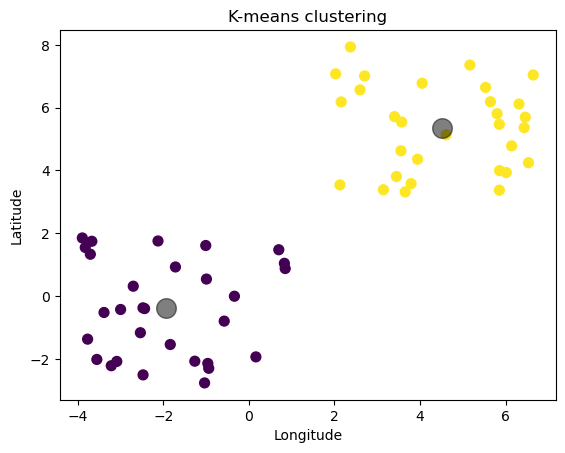

In [137]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)